In [1]:
import cv2
import numpy as np
import skimage.io as si
import skimage.color as sc
import skimage.transform as st
import matplotlib.pyplot as plt

## 1. Introduction
### 1.1. Using `OpenCV`
This section is follow the [previous transformation: translation](https://github.com/Nhan121/Some-statistical-GANs-simulations-drafts-/blob/master/Image_processing%20%26%20computer_vision/Image%20processing/Chapter2/translation-images.ipynb)

`Scaling` is just `resizing` of the image. `OpenCV` comes with a function `cv2.resize()` for this purpose. The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used. Preferable interpolation methods are:
- `cv2.INTER_AREA` for shrinking and 
- `cv2.INTER_CUBIC (slow)` & `cv2.INTER_LINEAR` for zooming. 
- By default, interpolation method used is `cv2.INTER_LINEAR` for all resizing purposes. 

Now, look at the `new_shape` of the following `resized_images`

#### Example 1.1.

In [2]:
img = si.imread(r"/kaggle/input/nhan-121/mang.JPG")
img = img[:2, : 3]

## downsized
img_res2 = cv2.resize(img,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
img_res3 = cv2.resize(img,None,fx=0.5, fy=1/3, interpolation = cv2.INTER_CUBIC)
## upsized
img_res4 = cv2.resize(img,None,fx=1.5, fy=2, interpolation = cv2.INTER_CUBIC)
## reshape
img_res5 = cv2.resize(img, (4, 4), interpolation = cv2.INTER_CUBIC)

print('img (original_shape = %s): \n %s \n'%(img.shape, img))
print('im_res2 (shape = %s), down_sized: \n %s \n'%(img_res2.shape, img_res2))
print('im_res3 (shape = %s), down_sized: \n %s \n'%(img_res3.shape, img_res3))
print('im_res4 (shape = %s), up_sized: \n %s \n'%(img_res4.shape, img_res4))
print('im_res5 (shape = %s), resized: \n %s'%(img_res5.shape, img_res5))

img (original_shape = (2, 3, 3)): 
 [[[251 253 248]
  [254 255 251]
  [250 255 249]]

 [[250 251 246]
  [252 254 249]
  [251 253 248]]] 

im_res2 (shape = (1, 2, 3)), down_sized: 
 [[[252 253 249]
  [250 254 248]]] 

im_res3 (shape = (1, 2, 3)), down_sized: 
 [[[251 253 248]
  [251 253 248]]] 

im_res4 (shape = (4, 4, 3)), up_sized: 
 [[[251 253 248]
  [253 254 250]
  [254 255 251]
  [251 255 249]]

 [[251 252 247]
  [252 254 249]
  [253 255 251]
  [251 255 249]]

 [[250 251 246]
  [251 253 248]
  [252 254 250]
  [251 254 248]]

 [[250 251 246]
  [251 252 247]
  [252 254 249]
  [251 253 248]]] 

im_res5 (shape = (4, 4, 3)), resized: 
 [[[251 253 248]
  [254 254 250]
  [253 255 251]
  [250 255 249]]

 [[251 252 247]
  [253 254 250]
  [253 255 250]
  [250 255 249]]

 [[250 251 246]
  [252 253 249]
  [252 254 249]
  [251 253 248]]

 [[250 251 246]
  [251 253 248]
  [252 254 249]
  [251 253 248]]]


#### Example 1.2. Display.

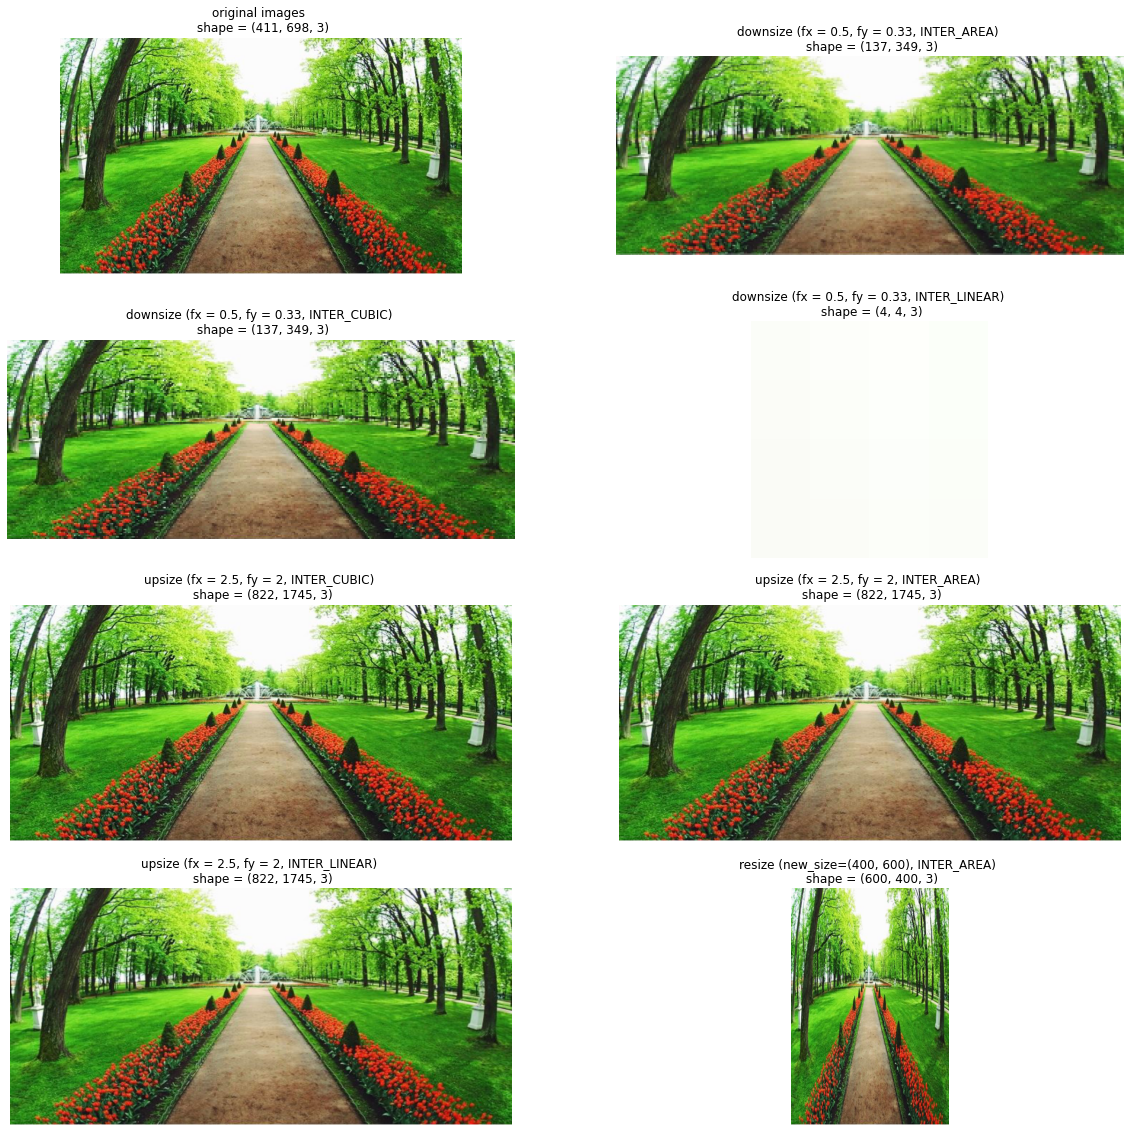

In [3]:
img = si.imread(r"/kaggle/input/nhan-121/mang.JPG")
## downsized
img_res2 = cv2.resize(img,None,fx=0.5, fy=1/3, interpolation = cv2.INTER_AREA)
img_res3 = cv2.resize(img,None,fx=0.5, fy=1/3, interpolation = cv2.INTER_CUBIC)
img_res3 = cv2.resize(img,None,fx=0.5, fy=1/3, interpolation = cv2.INTER_LINEAR)
## upsized
img_res5 = cv2.resize(img,None,fx=2.5, fy=2, interpolation = cv2.INTER_CUBIC)
img_res6 = cv2.resize(img,None,fx=2.5, fy=2, interpolation = cv2.INTER_AREA)
img_res7 = cv2.resize(img,None,fx=2.5, fy=2, interpolation = cv2.INTER_LINEAR)
## reshape another size
img_res8 = cv2.resize(img, (400, 600), interpolation = cv2.INTER_CUBIC)

images = [img, img_res2, img_res3, img_res4, 
          img_res5, img_res6, img_res7, img_res8]
titles = ['original images \n shape = ', 'downsize (fx = 0.5, fy = 0.33, INTER_AREA) \n shape = ',
          'downsize (fx = 0.5, fy = 0.33, INTER_CUBIC) \n shape = ', 'downsize (fx = 0.5, fy = 0.33, INTER_LINEAR) \n shape = ',
          'upsize (fx = 2.5, fy = 2, INTER_CUBIC) \n shape = ', 'upsize (fx = 2.5, fy = 2, INTER_AREA) \n shape = ',
          'upsize (fx = 2.5, fy = 2, INTER_LINEAR) \n shape = ', 'resize (new_size=(400, 600), INTER_AREA) \n shape = ']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize = (20, 20))
ax = axes.ravel()
for k in range(8):
    ax[k].imshow(images[k])
    ax[k].set_title(titles[k] + str(images[k].shape))
    ax[k].set_axis_off()

### 1.2. Using `skimage.transform`
Rescale operation resizes an image by a given scaling factor. The scaling factor can either be a single floating point value, or multiple values - one along each axis.

Resize serves the same purpose, but allows to specify an output image shape instead of a scaling factor.

Note that when down-sampling an image, resize and rescale should perform Gaussian smoothing to avoid aliasing artifacts. See the anti_aliasing and anti_aliasing_sigma arguments to these functions.

Downscale serves the purpose of down-sampling an n-dimensional image by integer factors using the local mean on the elements of each block of the size factors given as a parameter to the function.

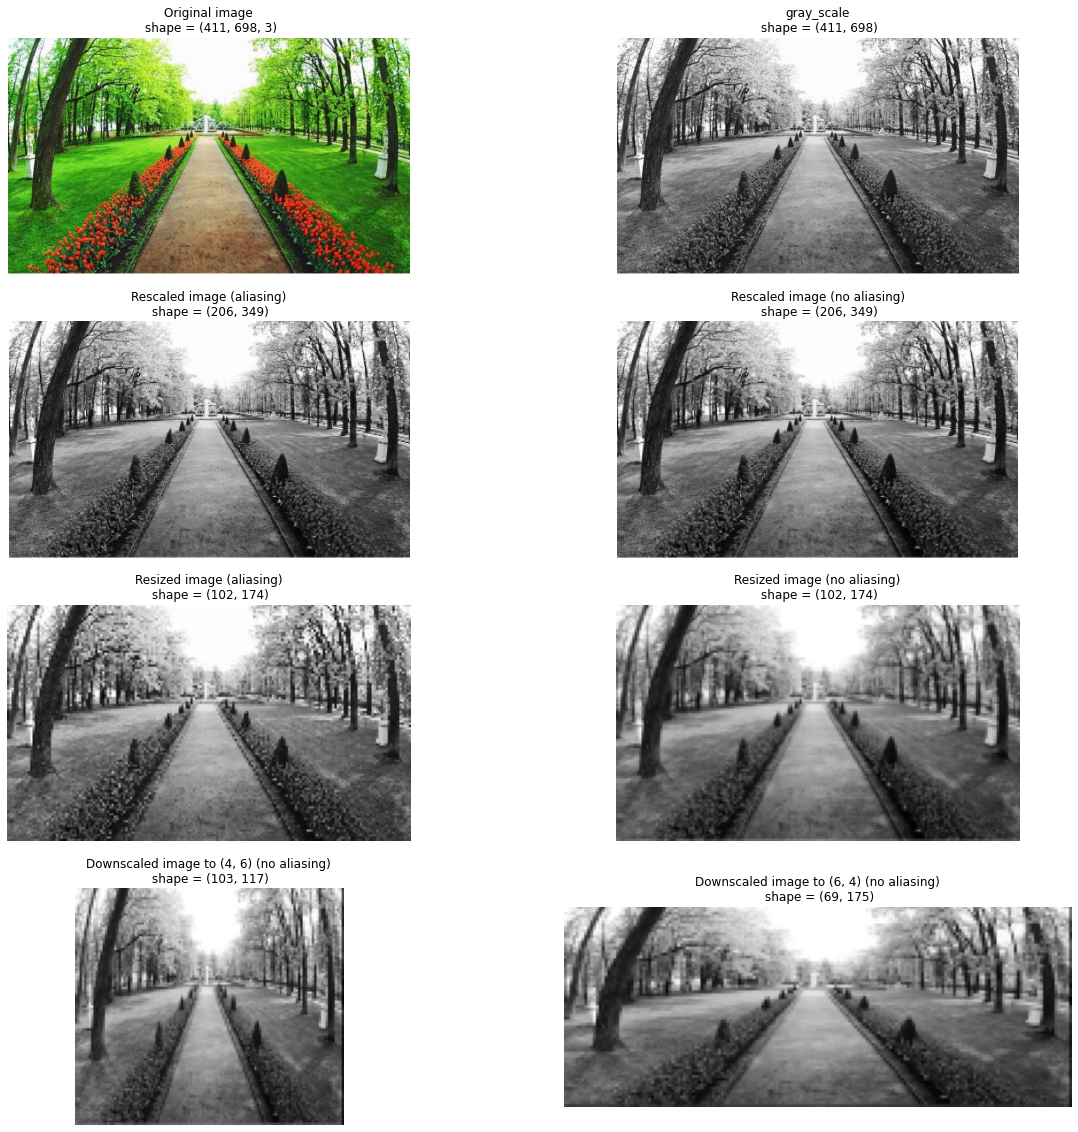

In [4]:
gray = sc.rgb2gray(img)
img_rescaled = st.rescale(gray, 0.5, anti_aliasing = False)
img_rescaled_a = st.rescale(gray, 0.5, anti_aliasing = True)
img_resized = st.resize(gray, (img.shape[0] // 4, img.shape[1] // 4),
                       anti_aliasing = False)
img_resized_a = st.resize(gray, (img.shape[0] // 4, img.shape[1] // 4),
                       anti_aliasing = True)
img_downscaled = st.downscale_local_mean(gray, (4, 6))
img_downscaled_t = st.downscale_local_mean(gray, (6, 4))

images = [img, gray, img_rescaled, img_rescaled_a, img_resized, 
          img_resized_a, img_downscaled, img_downscaled_t]
titles = ["Original image", "gray_scale", "Rescaled image (aliasing)", "Rescaled image (no aliasing)",
         "Resized image (aliasing)", "Resized image (no aliasing)", 
          "Downscaled image to (4, 6) (no aliasing)", "Downscaled image to (6, 4) (no aliasing)"]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize = (20, 20))
ax = axes.ravel()
for k in range(8):
    if k == 0:
        ax[k].imshow(images[k])
    else:
        ax[k].imshow(images[k], cmap='gray')        
    ax[k].set_title(titles[k]+"\n shape = "+str(images[k].shape))
    ax[k].set_axis_off()    